<a href="https://colab.research.google.com/github/Deepu-19/Coding/blob/main/Airbnb_NYC_2019_Simple_Data_Visualization_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
from google.colab import files
uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(uploaded['Airbnb NYC 2019.csv']))

df.head()


Saving Airbnb NYC 2019.csv to Airbnb NYC 2019.csv


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
# 🧹 Keep only useful columns
df = df[['neighbourhood_group', 'neighbourhood', 'room_type', 'price',
         'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']]

# 🧼 Fill missing values
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

# 🗑️ Remove outliers
df = df[(df['price'] > 0) & (df['price'] < 1000)]


/tmp/ipython-input-3-353186827.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews_per_month'] = df['reviews_per_month'].fillna(0)


/tmp/ipython-input-4-2353439422.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='neighbourhood_group', palette='Set2')


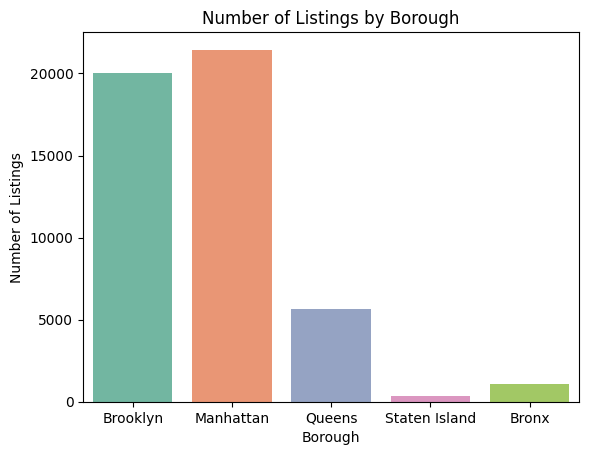

In [4]:
sns.countplot(data=df, x='neighbourhood_group', palette='Set2')
plt.title('Number of Listings by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Listings')
plt.show()


/tmp/ipython-input-5-1865944014.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='room_type', palette='Set3')


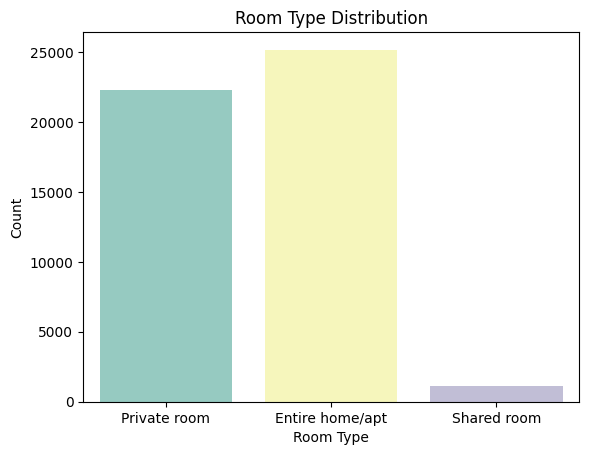

In [5]:
sns.countplot(data=df, x='room_type', palette='Set3')
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()


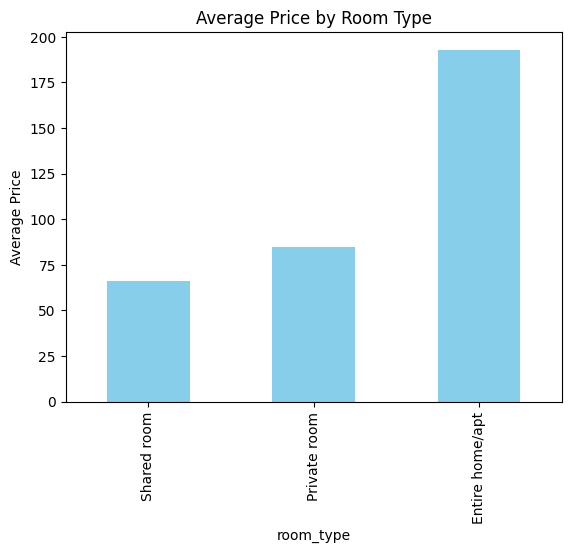

In [6]:
avg_price = df.groupby('room_type')['price'].mean().sort_values()
avg_price.plot(kind='bar', color='skyblue')
plt.title('Average Price by Room Type')
plt.ylabel('Average Price')
plt.show()


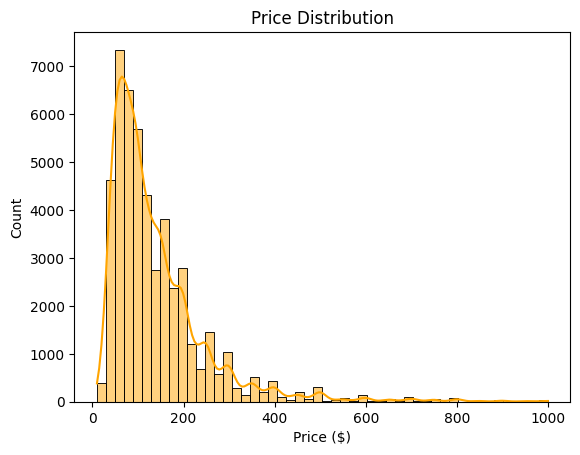

In [7]:
sns.histplot(df['price'], bins=50, kde=True, color='orange')
plt.title('Price Distribution')
plt.xlabel('Price ($)')
plt.show()


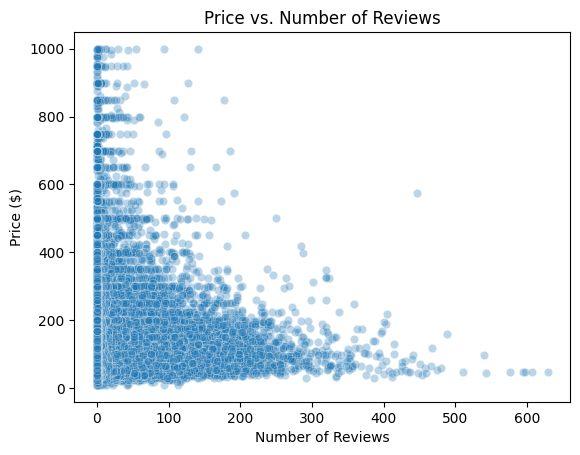

In [8]:
sns.scatterplot(data=df, x='number_of_reviews', y='price', alpha=0.3)
plt.title('Price vs. Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Price ($)')
plt.show()


## 📌 Key Takeaways

-  **Manhattan** has the highest number of listings.
- Most listings are **Entire home/apartment**, followed by **Private rooms**.
- **Private rooms** are usually cheaper.
-  Most prices are below **$500**.
-  Listings with **more reviews** are generally cheaper.
